## Summative Lab: Forest Fires Prevention

### Step 1: Load the Dataset

*   Install and import the ucimlrepo library.
*   Load the Forest Fires dataset:
 *   Predictors: Features from forest_fires.data.features.
 *   Target: forest_fires.data.targets.

In [ ]:
# Run pip install if necessary to access the UCI ML Repository (uncomment the next line)
# ! pip install ucimlrepo

In [32]:
# Data
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

forest_fires = fetch_ucirepo(id=162)
X = forest_fires.data.features
y = forest_fires.data.targets


# Display dataset structure
#print(X.info())
#print(X.describe())
print(X.head())
print(y.tail())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0
      area
512   6.44
513  54.29
514  11.16
515   0.00
516   0.00


#### Explanation of Variables ###

Dataset Information from the UCI website and definitions from Wikipedia.

- FFMC: Fine Fuel Moisture Code. Measures the moisture level in the smaller, surface materials that are often the first fuels to burn in a fire.
- DMC: Duff Moisture Code. Measures moisture levels in the organic soil just below the surface, as well as moisture in medium-sized woody material, such as small logs.
- DC: Drought Code.
- ISI: Initial Spread Index.
- temp: temperature in Celsius
- RH: relative humidity in %
- wind: wind speed in km/h
- rain: outside rain in mm/m<sup>2</sup>
- area: burned area of the forest in hectares (very skewed towards 0.0 it may make sense to model with a logarithmic transform). 

### Step 2: EDA

* Examine the dataset structure and summary statistics.
* Analyze correlations between predictors and the target variable.
* Plot scatterplots for key predictors vs. the target.
* Generate a residual plot to check for randomness in residuals.

In [76]:
log_area = np.log(y)

X_ffmc = sm.add_constant(X['FFMC'])
model_ffmc = sm.OLS(y, X_ffmc).fit()

X_dmc = sm.add_constant(X['DMC'])
model_dmc = sm.OLS(y, X_dmc).fit()

X_dc = sm.add_constant(X['DC'])
model_dc = sm.OLS(y, X_dc).fit()

X_isi = sm.add_constant(X['ISI'])
model_isi = sm.OLS(y, X_isi).fit()

X_temp = sm.add_constant(X['temp'])
model_temp = sm.OLS(y, X_temp).fit()

X_rh = sm.add_constant(X['RH'])
model_rh = sm.OLS(y, X_rh).fit()

X_wind = sm.add_constant(X['wind'])
model_wind = sm.OLS(y, X_wind).fit()

X_rain = sm.add_constant(X['rain'])
model_rain = sm.OLS(y, X_rain).fit()

print(f"P-value when fitting FFMC is {model_ffmc.pvalues.loc['FFMC']:.4f}")
print(f"P-value when fitting DMC is {model_dmc.pvalues.loc['DMC']:.4f}")
print(f"P-value when fitting DC is {model_dc.pvalues.loc['DC']:.4f}")
print(f"P-value when fitting ISI is {model_isi.pvalues.loc['ISI']:.4f}")
print(f"P-value when fitting temp is {model_temp.pvalues.loc['temp']:.4f}")
print(f"P-value when fitting RH is {model_rh.pvalues.loc['RH']:.4f}")
print(f"P-value when fitting wind is {model_wind.pvalues.loc['wind']:.4f}")
print(f"P-value when fitting rain is {model_rain.pvalues.loc['rain']:.4f}")


P-value when fitting FFMC is 0.3626
P-value when fitting DMC is 0.0973
P-value when fitting DC is 0.2624
P-value when fitting ISI is 0.8514
P-value when fitting temp is 0.0261
P-value when fitting RH is 0.0863
P-value when fitting wind is 0.7799
P-value when fitting rain is 0.8673


c:\Users\marha\.conda\envs\win_c0c1\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


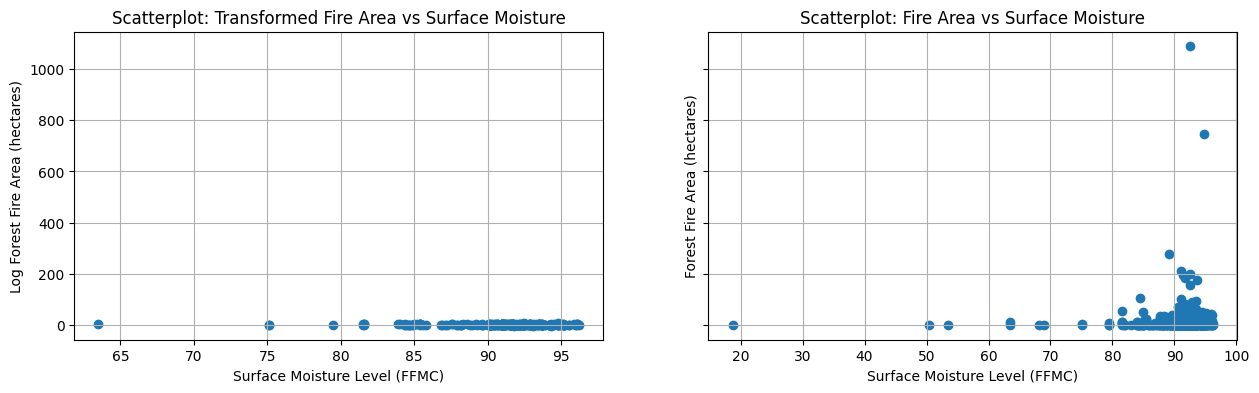

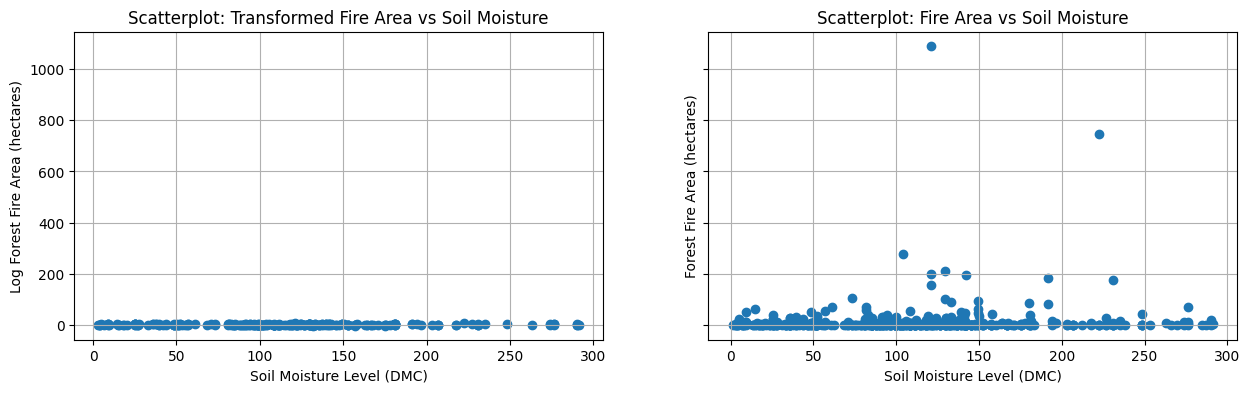

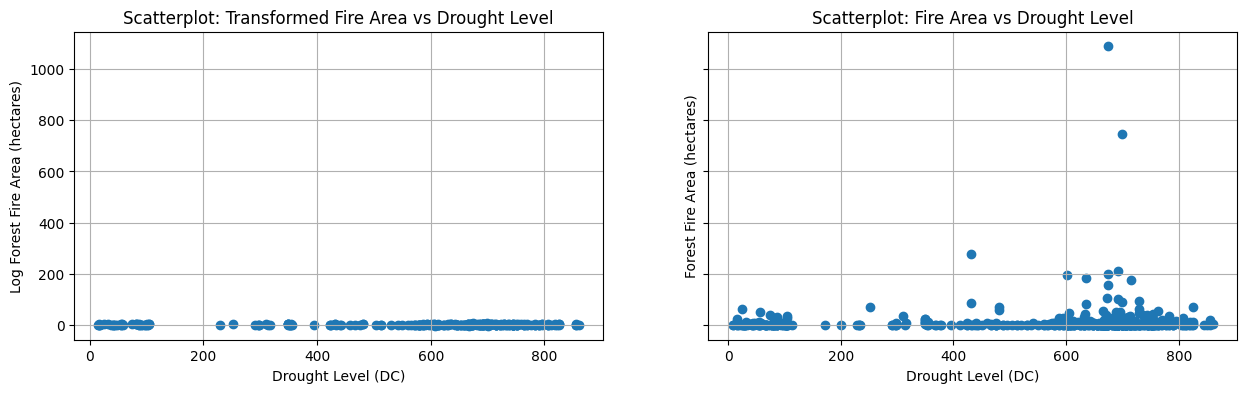

ValueError: Data must be 1-dimensional, got ndarray of shape (517, 1) instead

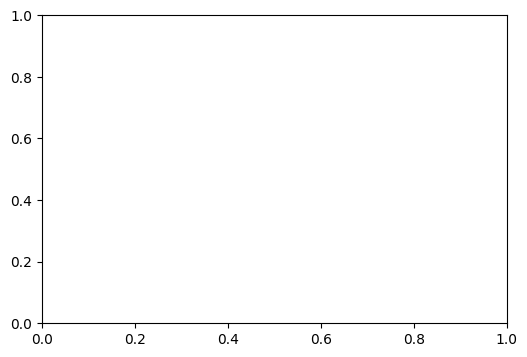

In [78]:
X['log_area'] = np.log(y)

# scatterplot: FFMC vs. area burned / log area burned
fig, axes = plt.subplots(1, 2, figsize=(15,4), sharey=True)
axes[0].scatter(X['FFMC'], log_y)
axes[0].set_title('Scatterplot: Transformed Fire Area vs Surface Moisture')
axes[0].set_xlabel('Surface Moisture Level (FFMC)')
axes[0].set_ylabel('Log Forest Fire Area (hectares)')
axes[0].grid(True)

axes[1].scatter(X['FFMC'], y)
axes[1].set_title('Scatterplot: Fire Area vs Surface Moisture')
axes[1].set_xlabel('Surface Moisture Level (FFMC)')
axes[1].set_ylabel('Forest Fire Area (hectares)')
axes[1].grid(True)
plt.show()

# scatterplot: DMC vs. area burned / log area burned
fig, axes = plt.subplots(1, 2, figsize=(15,4), sharey=True)
axes[0].scatter(X['DMC'], log_y)
axes[0].set_title('Scatterplot: Transformed Fire Area vs Soil Moisture')
axes[0].set_xlabel('Soil Moisture Level (DMC)')
axes[0].set_ylabel('Log Forest Fire Area (hectares)')
axes[0].grid(True)

axes[1].scatter(X['DMC'], y)
axes[1].set_title('Scatterplot: Fire Area vs Soil Moisture')
axes[1].set_xlabel('Soil Moisture Level (DMC)')
axes[1].set_ylabel('Forest Fire Area (hectares)')
axes[1].grid(True)
plt.show()

# scatterplot: DC vs. area burned / log area burned
fig, axes = plt.subplots(1, 2, figsize=(15,4), sharey=True)
axes[0].scatter(X['DC'], log_y)
axes[0].set_title('Scatterplot: Transformed Fire Area vs Drought Level')
axes[0].set_xlabel('Drought Level (DC)')
axes[0].set_ylabel('Log Forest Fire Area (hectares)')
axes[0].grid(True)

axes[1].scatter(X['DC'], y)
axes[1].set_title('Scatterplot: Fire Area vs Drought Level')
axes[1].set_xlabel('Drought Level (DC)')
axes[1].set_ylabel('Forest Fire Area (hectares)')
axes[1].grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x=X['DC'], y=log_y, ax=ax)
plt.title('Scatterplot: Fire Area vs Drought Level')
plt.xlabel('Drought Level (DC)')
plt.ylabel('Forest Fire Area (hectares)')
plt.grid(True)
plt.show()

# scatterplot: ISI vs. log area burned
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x=X['ISI'], y=log_y, ax=ax)
plt.title('Scatterplot: Fire Area vs Initial Spread')
plt.xlabel('Initial Spread (ISI)')
plt.ylabel('Forest Fire Area (hectares)')
plt.grid(True)
plt.show()

# scatterplot: temp vs. log area burned
fig, ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x=X['temp'], y=log_y, ax=ax)
plt.title('Scatterplot: Fire Area vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Forest Fire Area (hectares)')
plt.grid(True)
plt.show()

### Step 3: Fit the regression models

* Fit a baseline multiple linear regression model with key predictors.
* Include nonlinear terms (e.g., quadratic transformations for significant predictors).
* Add interaction terms (e.g., between predictors with strong correlations).
* Incorporate indicator variables if categorical variables are present.
* Apply transformations (e.g., logarithmic transformations for skewed predictors).

### Step 4: Evaluate model diagnostics

* Compare models using metrics like 2R^2, adjusted RR^2, AIC, and BIC.
* Plot residuals and create Q-Q plots to assess normality.
* Identify influential observations using Cook's Distance.

### Step 5: Apply regularization

* Use Ridge (L2) and Lasso (L1) regression from sklearn to handle multicollinearity.
* Extract coefficients and calculate Mean Squared Error (MSE).
* Compare the performance of Ridge and Lasso models.

### Step 6: Prepare the data for binary classification

* Create a binary target variable based on a threshold in y (e.g., median or other percentile).
* Select relevant predictors and scale them using StandardScaler.

### Step 7: Train and evaluate a logistic regression model

Train a logistic regression model using the scaled predictors.

* Display coefficients and the intercept.
* Predict probabilities and binary outcomes.
* Evaluate performance using accuracy, confusion matrix, precision, recall, and F1-score.

### Step 8: Check assumptions

* Use Variance Inflation Factor (VIF) to assess multicollinearity among predictors.

### Step 9: Summative Findings

* Compare regression models and classification results.
* Highlight trade-offs between model simplicity, performance, and interpretability.
* Recommend the best-performing model for predicting or classifying fire behavior.

[Type your findings here.]